In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Apple.csv')
df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7,5.0,NaN,157000,...,0,0,0,0,0,0,0,0,NaN,NaN
1,7/24/2017 12:21:07,Apple,L4,Software Engineer,50000,"London, EN, United Kingdom",2,2.0,NaN,0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,8/6/2017 22:23:02,Apple,Ict3,Software Engineer,200000,"Cupertino, CA",3,2.0,NaN,140000,...,0,0,0,0,0,0,0,0,NaN,NaN
3,8/10/2017 18:05:43,Apple,ICT2,Software Engineer,120000,"Cupertino, CA",5,2.0,NaN,95000,...,0,0,0,0,0,0,0,0,NaN,NaN
4,8/18/2017 21:57:34,Apple,ICT3,Software Engineer,200000,"Cupertino, CA",7,0.0,NaN,0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [2]:
missing_values = df.isnull().sum()
print(missing_values)

timestamp                     0
company                       0
level                         1
title                         0
totalyearlycompensation       0
location                      0
yearsofexperience             0
yearsatcompany                0
tag                          43
basesalary                    0
stockgrantvalue               0
bonus                         0
gender                      655
otherdetails                868
cityid                        0
dmaid                         0
rowNumber                     0
Masters_Degree                0
Bachelors_Degree              0
Doctorate_Degree              0
Highschool                    0
Some_College                  0
Race_Asian                    0
Race_White                    0
Race_Two_Or_More              0
Race_Black                    0
Race_Hispanic                 0
Race                       1426
Education                  1126
dtype: int64


# Data Processing

In [3]:
df['timestamp']=pd.to_datetime(df['timestamp'])
df['basesalary'].replace(0, np.mean(df['basesalary']), inplace=True)
df['gender'].replace(np.nan, 'Unknown', inplace=True)
df.drop(df.iloc[:, 13:27], inplace=True, axis=1)
df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,Race,Education
0,2017-06-17 00:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7,5.0,NaN,157000.000000,180000,35000,Unknown,NaN,NaN
1,2017-07-24 12:21:07,Apple,L4,Software Engineer,50000,"London, EN, United Kingdom",2,2.0,NaN,157045.657059,0,0,Unknown,NaN,NaN
2,2017-08-06 22:23:02,Apple,Ict3,Software Engineer,200000,"Cupertino, CA",3,2.0,NaN,140000.000000,40000,20000,Unknown,NaN,NaN
3,2017-08-10 18:05:43,Apple,ICT2,Software Engineer,120000,"Cupertino, CA",5,2.0,NaN,95000.000000,80000,8000,Unknown,NaN,NaN
4,2017-08-18 21:57:34,Apple,ICT3,Software Engineer,200000,"Cupertino, CA",7,0.0,NaN,157045.657059,0,0,Unknown,NaN,NaN


In [4]:
undesired_titles = ['Marketing', 'Mechanical Engineer', 'Sales', 'Recruiter', 'Human Resources']
df = df[df['title'].apply(lambda x: x not in undesired_titles)]
# df = df.drop(['tag'], axis=1)
df = df.fillna({'company':'Unknown', 'gender':'Unknown','Race': 'Unknown', 'Education': 'Unknown'})
df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,Race,Education
0,2017-06-17 00:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7,5.0,NaN,157000.000000,180000,35000,Unknown,Unknown,Unknown
1,2017-07-24 12:21:07,Apple,L4,Software Engineer,50000,"London, EN, United Kingdom",2,2.0,NaN,157045.657059,0,0,Unknown,Unknown,Unknown
2,2017-08-06 22:23:02,Apple,Ict3,Software Engineer,200000,"Cupertino, CA",3,2.0,NaN,140000.000000,40000,20000,Unknown,Unknown,Unknown
3,2017-08-10 18:05:43,Apple,ICT2,Software Engineer,120000,"Cupertino, CA",5,2.0,NaN,95000.000000,80000,8000,Unknown,Unknown,Unknown
4,2017-08-18 21:57:34,Apple,ICT3,Software Engineer,200000,"Cupertino, CA",7,0.0,NaN,157045.657059,0,0,Unknown,Unknown,Unknown


# Correlation

In [5]:
df.columns

Index(['timestamp', 'company', 'level', 'title', 'totalyearlycompensation',
       'location', 'yearsofexperience', 'yearsatcompany', 'tag', 'basesalary',
       'stockgrantvalue', 'bonus', 'gender', 'Race', 'Education'],
      dtype='object')

In [6]:
df_model = df[['title','yearsofexperience','yearsatcompany','basesalary','stockgrantvalue','bonus','totalyearlycompensation']]
df_model.head()

,title,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,totalyearlycompensation
0,Software Engineering Manager,7,5.0,157000.000000,180000,35000,372000
1,Software Engineer,2,2.0,157045.657059,0,0,50000
2,Software Engineer,3,2.0,140000.000000,40000,20000,200000
3,Software Engineer,5,2.0,95000.000000,80000,8000,120000
4,Software Engineer,7,0.0,157045.657059,0,0,200000


In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_model['title'] = le.fit_transform(df_model['title'])

/var/folders/9b/bgvnc2sj75z3mhszv6c80qw80000gn/T/ipykernel_2508/949237972.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['title'] = le.fit_transform(df_model['title'])


In [8]:
df_model['title'].value_counts()

5    1209
2     419
6      84
1      78
4      62
8      60
3      26
0       8
7       5
Name: title, dtype: int64

In [9]:
df['title'].value_counts()

Software Engineer               1209
Hardware Engineer                419
Software Engineering Manager      84
Data Scientist                    78
Product Manager                   62
Technical Program Manager         60
Product Designer                  26
Business Analyst                   8
Solution Architect                 5
Name: title, dtype: int64

In [10]:
corr_matrix = df_model.corr()

to_drop = []
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.9:
            colname = corr_matrix.columns[i]
            if colname not in to_drop:
                to_drop.append(colname)

df_model.drop(to_drop, axis=1, inplace=True)

/var/folders/9b/bgvnc2sj75z3mhszv6c80qw80000gn/T/ipykernel_2508/3134125425.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model.drop(to_drop, axis=1, inplace=True)


In [11]:
df_model.head(5)

,title,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,totalyearlycompensation
0,6,7,5.0,157000.000000,180000,35000,372000
1,5,2,2.0,157045.657059,0,0,50000
2,5,3,2.0,140000.000000,40000,20000,200000
3,5,5,2.0,95000.000000,80000,8000,120000
4,5,7,0.0,157045.657059,0,0,200000


# Outlier

In [12]:
z = np.abs((df_model - df_model.mean()) / df_model.std())
outliers = z > 3
df_model = df_model[~outliers.any(axis=1)]

In [13]:
x = df_model.drop(['totalyearlycompensation'] , axis = 1).values
y = df_model['totalyearlycompensation'].values

In [14]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size=0.30 , random_state = 42)

from sklearn.preprocessing import RobustScaler
ro_scaler = RobustScaler()
x_train = ro_scaler.fit_transform(x_train)
x_test = ro_scaler.fit_transform(x_test)

# Linear Rgression

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
lr = linear_model.LinearRegression()

lr.fit(x_train , y_train)
lr.score(x_train , y_train)

0.8670766047232655

In [16]:
lr.score(x_test , y_test)

0.816047764779342

In [17]:
y_pred = lr.predict(x_test)
df_1 = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
df_1.head(10)

,Y_test,Y_pred
0,160000,174373.770811
1,221000,234742.084990
2,254000,259304.084615
3,370000,390011.252392
4,160000,180018.011491
5,181000,193609.999795
6,240000,203434.754045
7,178000,205247.570817
8,307000,310572.996544
9,291000,297377.348501


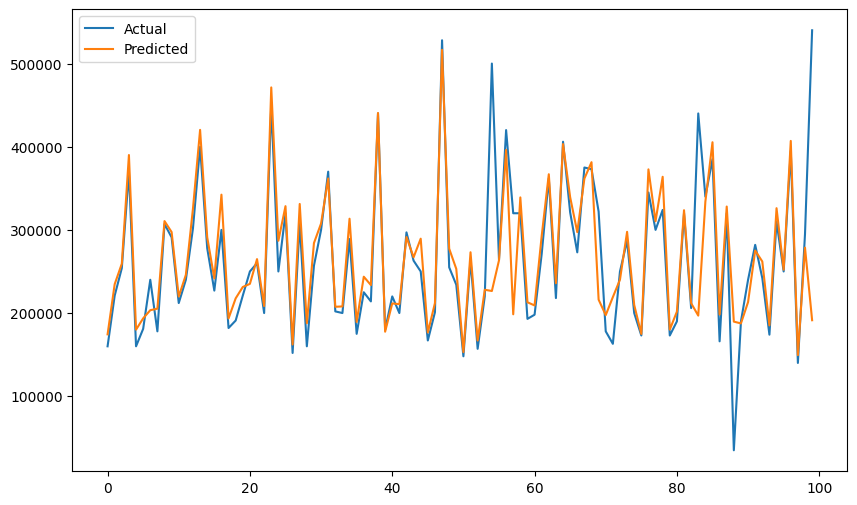

In [18]:
plt.figure(figsize=(10,6))
plt.plot(df_1[:100])
plt.legend(['Actual' , 'Predicted'])

In [19]:
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error,  r2_score
mse = mean_squared_error(y_test , y_pred)
mse

1611642681.6606474

In [20]:
rsq = r2_score(y_test,y_pred)
rsq

0.816047764779342

In [21]:
df_2 = df_1.sort_values(by = ['Y_pred'], ascending = False)
df_2.head(5)

,Y_test,Y_pred
479,600000,584363.165639
456,585000,531727.914825
47,528000,516502.312661
410,525000,513001.168837
157,500000,506665.044715


# KNN

In [22]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train, y_train)
knn.score(x_train , y_train)

0.9360114483303553

In [23]:
knn.score(x_test , y_test)

0.8193781799386598

In [24]:
y_pred = knn.predict(x_test)
df_3 = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
df_3.head(10)

,Y_test,Y_pred
0,160000,180800.0
1,221000,224200.0
2,254000,253400.0
3,370000,392200.0
4,160000,186000.0
5,181000,190000.0
6,240000,212000.0
7,178000,183400.0
8,307000,293000.0
9,291000,283400.0


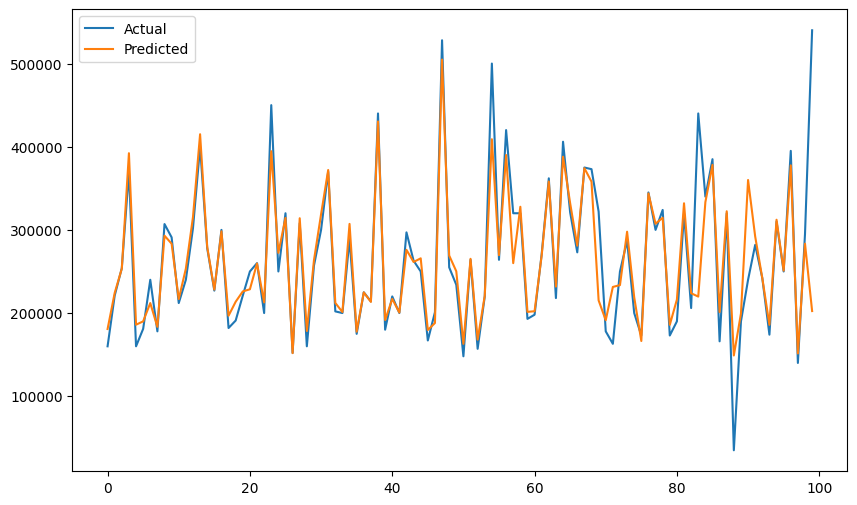

In [25]:
plt.figure(figsize=(10,6))
plt.plot(df_3[:100])
plt.legend(['Actual' , 'Predicted'])

In [26]:
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error,  r2_score
mse = mean_squared_error(y_test , y_pred)
mse

1582464241.8772564

In [27]:
rsq = r2_score(y_test,y_pred)
rsq

0.8193781799386598

In [28]:
df_4 = df_3.sort_values(by = ['Y_pred'], ascending = False)
df_4.head(5)

,Y_test,Y_pred
479,600000,545600.0
456,585000,532800.0
410,525000,531400.0
47,528000,504800.0
454,510000,483000.0


# Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_features=2, max_depth=4)
rf.fit(x_train , y_train) 
rf.score(x_train , y_train)

0.17337461300309598

In [30]:
rf.score(x_test , y_test)

0.061371841155234655

In [31]:
y_pred = rf.predict(x_test)
df_5 = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
df_5.head(10)

,Y_test,Y_pred
0,160000,180000
1,221000,210000
2,254000,250000
3,370000,350000
4,160000,200000
5,181000,210000
6,240000,200000
7,178000,200000
8,307000,300000
9,291000,300000


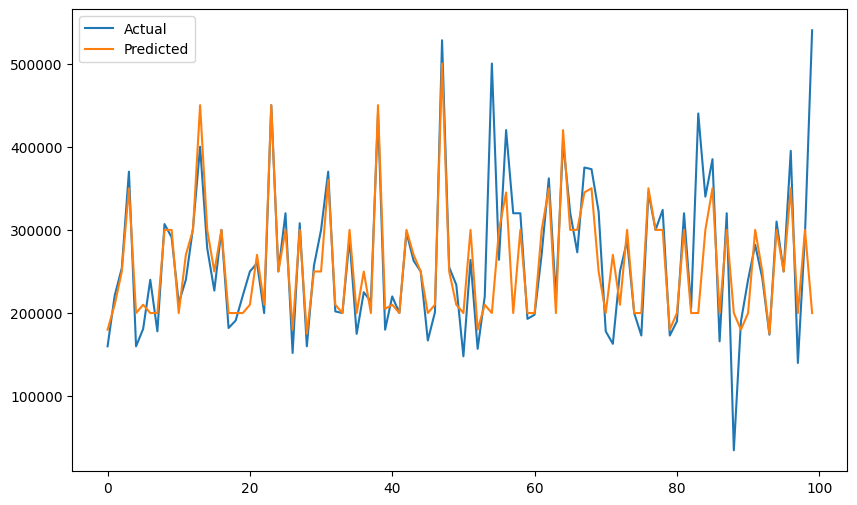

In [32]:
plt.figure(figsize=(10,6))
plt.plot(df_5[:100])
plt.legend(['Actual' , 'Predicted'])

In [33]:
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error,  r2_score
mse = mean_squared_error(y_test , y_pred)
mse

2223125902.527076

In [34]:
rsq = r2_score(y_test,y_pred)
rsq

0.746253320540373

In [35]:
df_6 = df_5.sort_values(by = ['Y_pred'], ascending = False)
df_6.head(5)

,Y_test,Y_pred
410,525000,500000
47,528000,500000
401,500000,500000
479,600000,500000
481,505000,500000


# Neural Net

In [36]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=(10, 10), max_iter=1000)
mlp.fit(x_train, y_train)
mlp.score(x_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


-1.598186603030641

In [37]:
mlp.score(x_test , y_test)

-1.7572495089766358

In [38]:
y_pred = rf.predict(x_test)
df_7 = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
df_7.head(10)

,Y_test,Y_pred
0,160000,180000
1,221000,210000
2,254000,250000
3,370000,350000
4,160000,200000
5,181000,210000
6,240000,200000
7,178000,200000
8,307000,300000
9,291000,300000


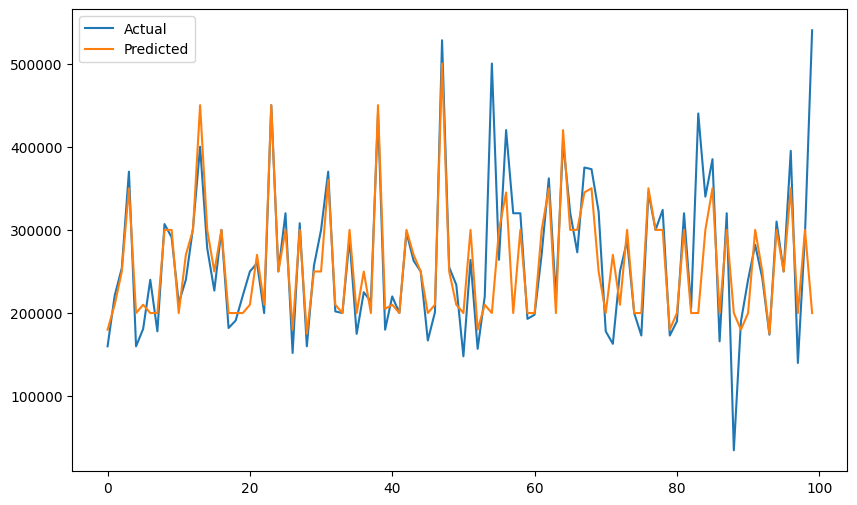

In [39]:
plt.figure(figsize=(10,6))
plt.plot(df_7[:100])
plt.legend(['Actual' , 'Predicted'])

In [40]:
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error,  r2_score
mse = mean_squared_error(y_test , y_pred)
mse

2223125902.527076

In [41]:
rsq = r2_score(y_test,y_pred)
rsq

0.746253320540373

In [42]:
df_8 = df_7.sort_values(by = ['Y_pred'], ascending = False)
df_8.head(5)

,Y_test,Y_pred
410,525000,500000
47,528000,500000
401,500000,500000
479,600000,500000
481,505000,500000


# SVM

In [43]:
from sklearn.svm import SVR
svm = SVR(kernel='linear')
svm.fit(x_train, y_train)
svm.score(x_train, y_train)

-0.01675369189320053

In [44]:
svm.score(x_test , y_test)

0.006198779925144504

In [45]:
y_pred = svm.predict(x_test)
df_9 = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
df_9.head(10)

,Y_test,Y_pred
0,160000,250003.888009
1,221000,251012.306153
2,254000,251292.605559
3,370000,254165.965319
4,160000,250284.387693
5,181000,250408.397539
6,240000,250317.358482
7,178000,250629.373908
8,307000,252190.632288
9,291000,251638.157636


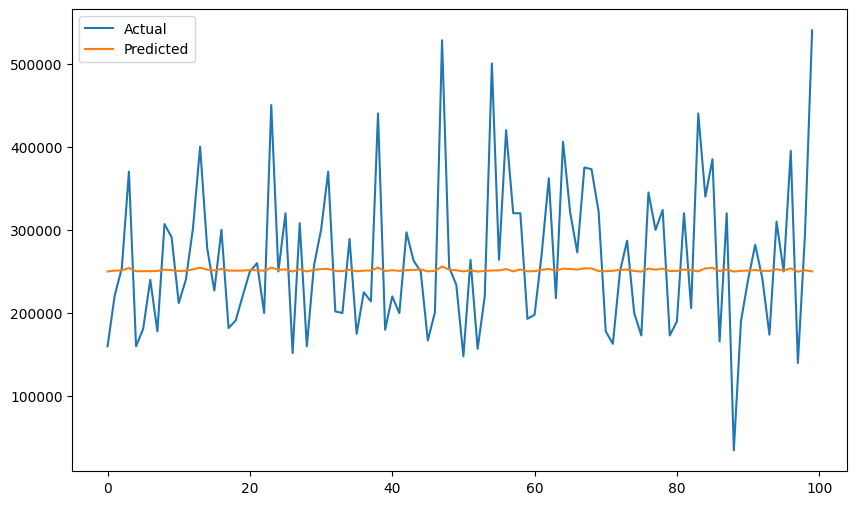

In [46]:
plt.figure(figsize=(10,6))
plt.plot(df_9[:100])
plt.legend(['Actual' , 'Predicted'])

In [47]:
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error,  r2_score
mse = mean_squared_error(y_test , y_pred)
mse

8706893185.819777

In [48]:
rsq = r2_score(y_test,y_pred)
rsq

0.006198779925144504

In [49]:
df_10 = df_9.sort_values(by = ['Y_pred'], ascending = False)
df_10.head(5)

,Y_test,Y_pred
479,600000,257823.342253
410,525000,256625.819572
157,500000,256076.704574
47,528000,255902.504564
456,585000,255402.510422


# Gain Chart

In [55]:
y_test_methods = [df_2['Y_test'], df_4['Y_test'], df_6['Y_test'], df_8['Y_test']]
y_pred_methods = [df_2['Y_pred'], df_4['Y_pred'], df_6['Y_pred'], df_8['Y_pred']]

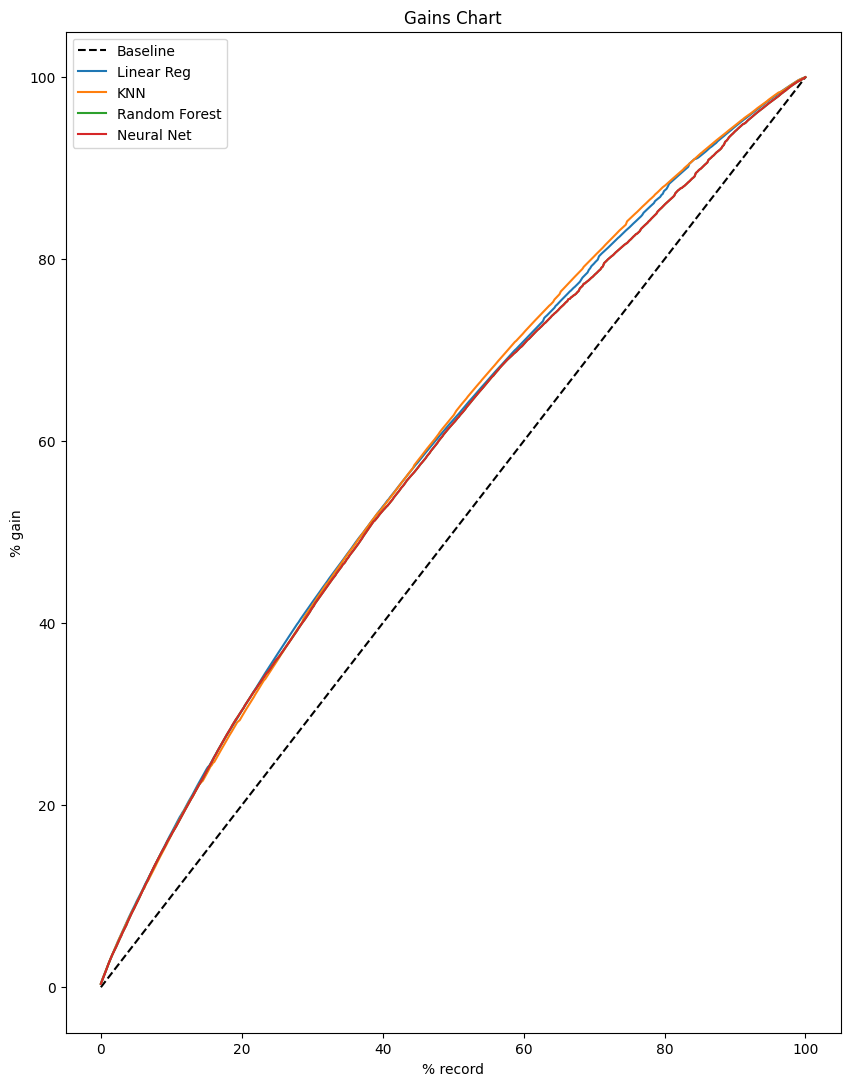

In [56]:
def cumulative_gain(y_test, y_pred):
    sorted_indices = np.argsort(y_pred)[::-1]
    sorted_labels = y_test.iloc[sorted_indices]
    cumulative_gains = np.cumsum(sorted_labels) / np.sum(sorted_labels)
    return cumulative_gains

# calculate the cumulative gain for each method
gains = []
for i in range(len(y_test_methods)):
    gains.append(cumulative_gain(y_test_methods[i], y_pred_methods[i]))

# plot the cumulative gain chart
plt.figure(figsize=(10, 13))
plt.plot(np.linspace(0, 100, len(y_test_methods[0])), np.linspace(0, 100, len(y_test_methods[0])), 'k--', label='Baseline')
for i in range(len(gains)):
    plt.plot(np.linspace(0, 100, len(y_test_methods[0])), gains[i]*100, label=f'{["Linear Reg", "KNN", "Random Forest", "Neural Net", "SVM"][i]}')
plt.xlabel('% record')
plt.ylabel('% gain')
plt.title('Gains Chart')
plt.legend()
plt.show()